In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df = pd.read_csv('data.csv')
df.head(3)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,NaN,Townhouse,2517 Marbourne Ave,Baltimore,MD,21230,100500.0,NaN,1.0,...,NaN,NaN,NaN,https://www.redfin.com/MD/Baltimore/2517-Marbo...,NaN,NaN,N,Y,39.254160,-76.649442
1,PAST SALE,NaN,Townhouse,704 W 36th St,Baltimore,MD,21211,335000.0,NaN,1.5,...,NaN,NaN,NaN,https://www.redfin.com/MD/Baltimore/704-W-36th...,NaN,NaN,N,Y,39.331455,-76.628557
2,PAST SALE,November-23-2022,Townhouse,1139 W Cross St,Baltimore,MD,21230,150000.0,2.0,1.5,...,Sold,NaN,NaN,https://www.redfin.com/MD/Baltimore/1139-W-Cro...,BRIGHT MLS,MDBA2063990,N,Y,39.281726,-76.631217


In [5]:
df.shape

(8324, 27)

In [6]:
df1 = df.drop(
    ['SALE TYPE','SOLD DATE','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','ADDRESS',
     'STATUS','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
     'DAYS ON MARKET','SOURCE','HOA/MONTH', 'LOT SIZE','MLS#', 'FAVORITE', 'INTERESTED', 'STATE OR PROVINCE', 'LATITUDE',
     'LONGITUDE', 'ZIP OR POSTAL CODE', 'PROPERTY TYPE', 'YEAR BUILT', 'LOCATION'],axis='columns')
df1.rename(columns = {'$/SQUARE FEET':'PRICE/SQFT', 'SQUARE FEET': 'SQFT'}, inplace = True)
df1.head()

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE/SQFT
0,Baltimore,100500.0,NaN,1.0,1024.0,98.0
1,Baltimore,335000.0,NaN,1.5,1780.0,188.0
2,Baltimore,150000.0,2.0,1.5,1152.0,130.0
3,Baltimore,285000.0,NaN,2.5,2094.0,136.0
4,Baltimore,250000.0,NaN,2.0,1761.0,142.0


In [7]:
df1.shape

(8324, 6)

In [8]:
df1.isnull().sum()

CITY            0
PRICE           2
BEDS          865
BATHS         505
SQFT          584
PRICE/SQFT    586
dtype: int64

In [9]:
df2 = df1.dropna()
df2.isnull().sum()

CITY          0
PRICE         0
BEDS          0
BATHS         0
SQFT          0
PRICE/SQFT    0
dtype: int64

In [10]:
df2.shape

(7083, 6)

In [11]:
df2.head(3)

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE/SQFT
2,Baltimore,150000.0,2.0,1.5,1152.0,130.0
8,Baltimore,180000.0,2.0,2.0,1461.0,123.0
9,Baltimore,215000.0,3.0,2.0,1728.0,124.0


In [12]:
df3=df2.copy()
df3['BATHS'] = df3['BATHS'].astype(float)
df3.head()


,CITY,PRICE,BEDS,BATHS,SQFT,PRICE/SQFT
2,Baltimore,150000.0,2.0,1.5,1152.0,130.0
8,Baltimore,180000.0,2.0,2.0,1461.0,123.0
9,Baltimore,215000.0,3.0,2.0,1728.0,124.0
10,Baltimore,190000.0,3.0,2.0,1575.0,121.0
11,Baltimore,145000.0,1.0,1.0,924.0,157.0


In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['SQFT'].apply(is_float)].head(10)

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE/SQFT


In [14]:
df3.shape

(7083, 6)

In [15]:
df4=df3.copy()
df4_stats = df4['PRICE/SQFT'].describe()
df4_stats

count    7083.000000
mean      380.121135
std       374.911074
min         0.000000
25%       162.000000
50%       247.000000
75%       484.000000
max      5026.000000
Name: PRICE/SQFT, dtype: float64

In [16]:
df4.to_csv("hsp.csv",index=False)

In [17]:
df5=df4.copy()
df5.CITY = df5.CITY.apply(lambda x: x.strip())
location_stats = df5['CITY'].value_counts(ascending=False)
location_stats

Seattle              339
Vancouver            333
San Jose             325
Jacksonville         323
Chicago              322
                    ... 
Grandview Heights      1
Groveport              1
Park Ridge             1
Whiting                1
Oxon Hill              1
Name: CITY, Length: 284, dtype: int64

In [18]:
location_stats.values.sum()

7083

In [19]:
len(location_stats[location_stats>10])

41

In [20]:
len(location_stats)

284

In [21]:
len(location_stats[location_stats<=10])

243

In [22]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Bronx                10
Campbell             10
Galloway              9
Katy                  9
Laveen                9
                     ..
Grandview Heights     1
Groveport             1
Park Ridge            1
Whiting               1
Oxon Hill             1
Name: CITY, Length: 243, dtype: int64

In [23]:
len(df5.CITY.unique())

284

In [24]:
df6 = df5.copy()
df6.CITY = df6.CITY.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.CITY.unique())

42

In [25]:
df6.head(10)

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE/SQFT
2,Baltimore,150000.0,2.0,1.5,1152.0,130.0
8,Baltimore,180000.0,2.0,2.0,1461.0,123.0
9,Baltimore,215000.0,3.0,2.0,1728.0,124.0
10,Baltimore,190000.0,3.0,2.0,1575.0,121.0
11,Baltimore,145000.0,1.0,1.0,924.0,157.0
12,Baltimore,381000.0,4.0,3.5,3059.0,125.0
17,Baltimore,385000.0,5.0,3.5,3306.0,116.0
24,Baltimore,115000.0,3.0,1.0,1216.0,95.0
25,Baltimore,210000.0,3.0,1.5,1400.0,150.0
27,Baltimore,340000.0,3.0,1.5,1734.0,196.0


In [26]:
df6[df6.SQFT/df6.BEDS<200].head()

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE/SQFT
316,Baltimore,55000.0,2.0,1.0,50.0,1100.0
1110,Chicago,310000.0,49.0,28.0,6264.0,49.0
1355,Chicago,78500.0,5.0,3.0,874.0,90.0
1579,Cleveland,144500.0,4.0,2.0,745.0,194.0
2734,Detroit,167000.0,6.0,2.0,1140.0,146.0


In [27]:
df7 = df6.copy()
df7 = df7[~(df7.SQFT/(df7.BEDS)<200)]
df7.shape

(7070, 6)

In [28]:
df7.rename(columns = {'PRICE/SQFT': 'PRICE_SQFT'}, inplace = True)
df7.head()

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE_SQFT
2,Baltimore,150000.0,2.0,1.5,1152.0,130.0
8,Baltimore,180000.0,2.0,2.0,1461.0,123.0
9,Baltimore,215000.0,3.0,2.0,1728.0,124.0
10,Baltimore,190000.0,3.0,2.0,1575.0,121.0
11,Baltimore,145000.0,1.0,1.0,924.0,157.0


In [29]:
df7.PRICE_SQFT.describe()

count    7070.000000
mean      380.019236
std       374.727421
min         0.000000
25%       162.000000
50%       247.000000
75%       484.000000
max      5026.000000
Name: PRICE_SQFT, dtype: float64

In [30]:
def remove_outliers(df):
    df_outliers = pd.DataFrame()
    for key, value in df.groupby('CITY'):
        mean_avg = np.mean(value.PRICE_SQFT)
        stdev = np.std(value.PRICE_SQFT)
        reduced_df = value[(value.PRICE_SQFT>(mean_avg-stdev)) & (value.PRICE_SQFT<=(mean_avg+stdev))]
        df_outliers = pd.concat([df_outliers,reduced_df],ignore_index=True)
    return df_outliers
df8 = remove_outliers(df7)
df8.shape

(5569, 6)

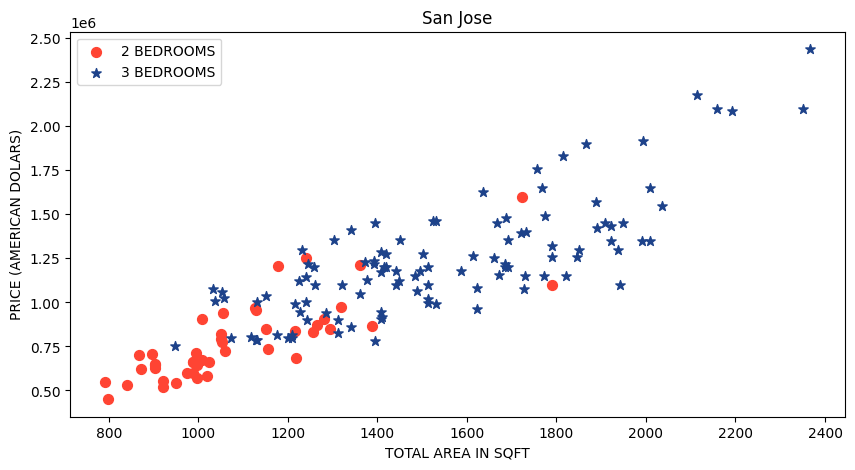

In [31]:
def plot_scatter_chart(df,CITY):
    beds2 = df[(df.CITY==CITY) & (df.BEDS==2)]
    beds3 = df[(df.CITY==CITY) & (df.BEDS==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    plt.scatter(beds2.SQFT,beds2.PRICE,marker='o', color='#FF4433',label='2 BEDROOMS', s=50)    
    plt.scatter(beds3.SQFT,beds3.PRICE,marker='*', color='#1D428A',label='3 BEDROOMS', s=50)
    plt.xlabel("TOTAL AREA IN SQFT")
    plt.ylabel("PRICE (AMERICAN DOLARS)")
    plt.title(CITY)
    plt.legend()
    
plot_scatter_chart(df8,"San Jose")

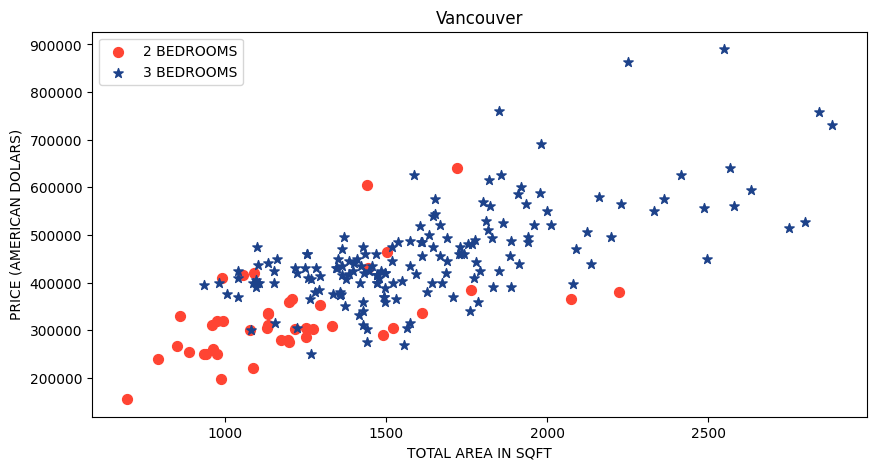

In [32]:
plot_scatter_chart(df8,"Vancouver")

In [33]:
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },    
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [34]:
def remove_bedroom_outliers(df):
    exclude = np.array([])
    for city, cities in df.groupby('CITY'):
        living_stats = {}
        for bedroom, living in cities.groupby('BEDS'):
            living_stats[bedroom] = {
                'mean': np.mean(living.PRICE_SQFT),
                'std': np.std(living.PRICE_SQFT),
                'count': living.shape[0]
            }
        for bedroom, living in cities.groupby('BEDS'):
            stats = living_stats.get(bedroom-1)
            if stats and stats['count']>5:
                exclude = np.append(exclude , living[living.PRICE_SQFT<(stats['mean'])].index.values)
    return df.drop(exclude,axis='index')
df9 = remove_bedroom_outliers(df8)
df9.shape

(2869, 6)

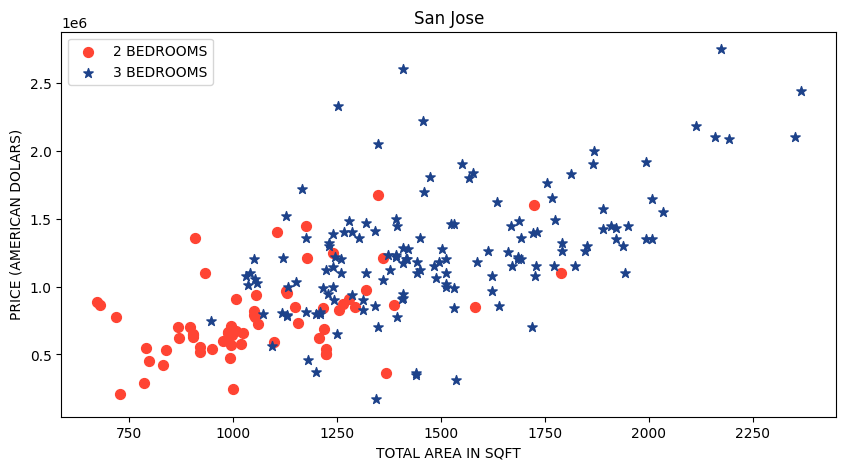

In [35]:
plot_scatter_chart(df6,"San Jose")

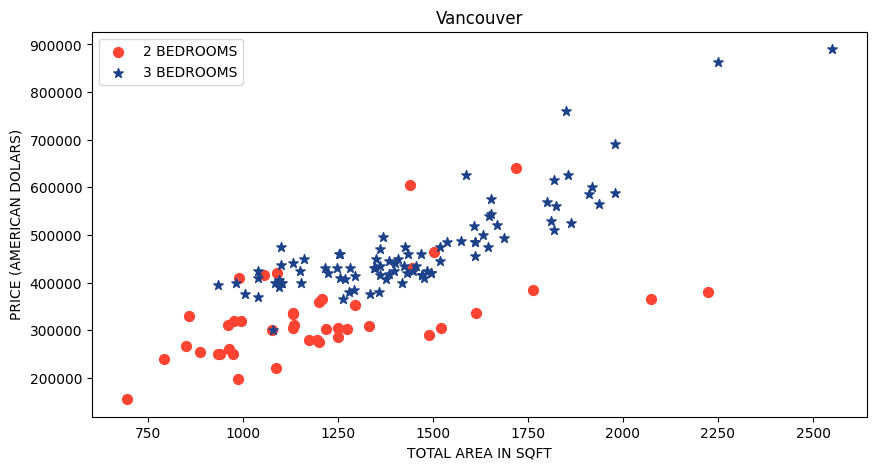

In [36]:
plot_scatter_chart(df9,"Vancouver")

Text(0, 0.5, 'COUNT')

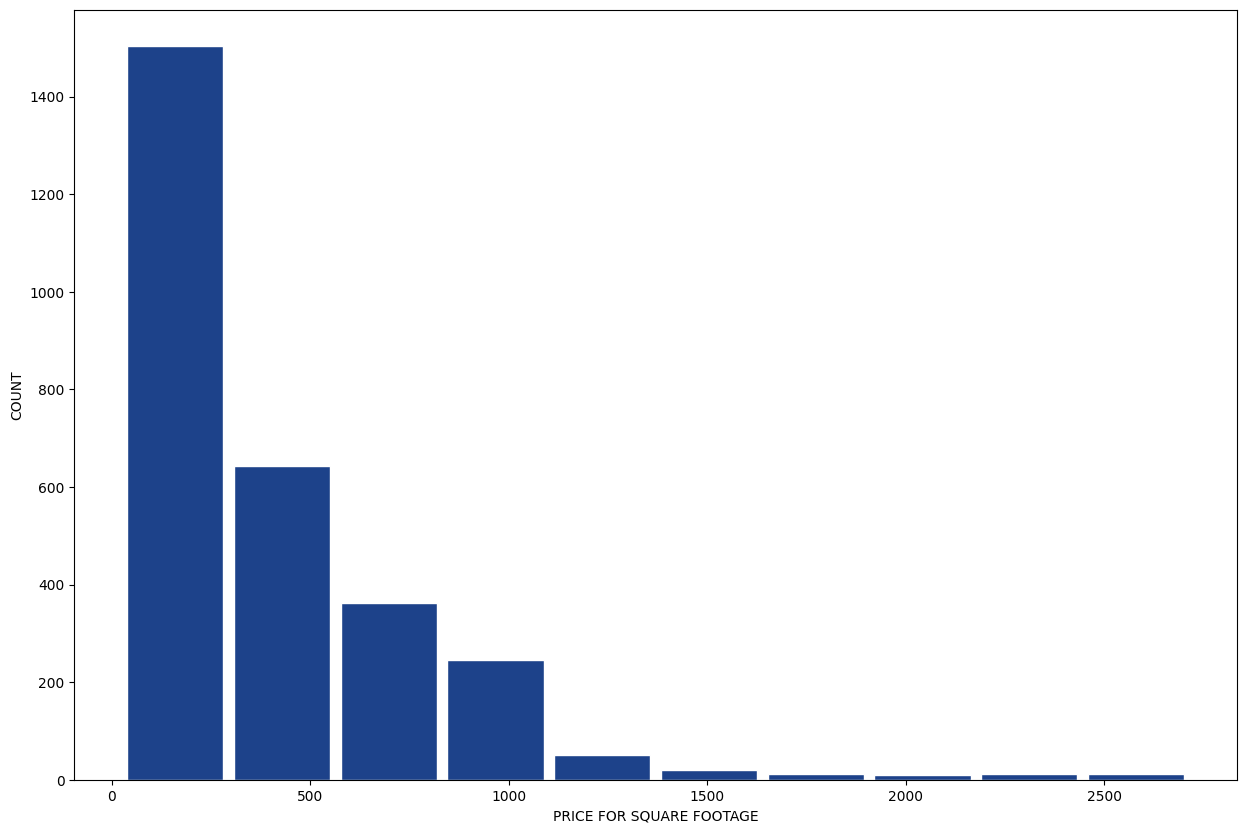

In [37]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,10)
plt.hist(df9.PRICE_SQFT,color='#1D428A',rwidth=0.9, edgecolor='WHITE')
plt.xlabel("PRICE FOR SQUARE FOOTAGE")
plt.ylabel("COUNT")

In [38]:
df9.head()

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE_SQFT
0,Antioch,369000.0,3.0,2.5,1720.0,215.0
1,Antioch,279900.0,2.0,2.5,1258.0,222.0
2,Antioch,379900.0,3.0,2.5,1666.0,228.0
3,Antioch,359900.0,3.0,2.5,1530.0,235.0
4,Antioch,525000.0,4.0,3.5,2523.0,208.0


In [39]:
df9.shape

(2869, 6)

In [40]:
df9.BATHS.unique()

array([ 2.5 ,  3.5 ,  3.  ,  2.  ,  1.5 ,  1.  ,  4.5 ,  4.  ,  5.  ,
        5.5 ,  6.  ,  7.  , 20.  ,  8.5 ,  8.  ,  6.5 ,  1.75, 13.5 ,
        0.5 ])

In [41]:
df9['BATHS'] = df9['BATHS'].astype(int)
df9.head()

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE_SQFT
0,Antioch,369000.0,3.0,2,1720.0,215.0
1,Antioch,279900.0,2.0,2,1258.0,222.0
2,Antioch,379900.0,3.0,2,1666.0,228.0
3,Antioch,359900.0,3.0,2,1530.0,235.0
4,Antioch,525000.0,4.0,3,2523.0,208.0


Text(0, 0.5, 'COUNT')

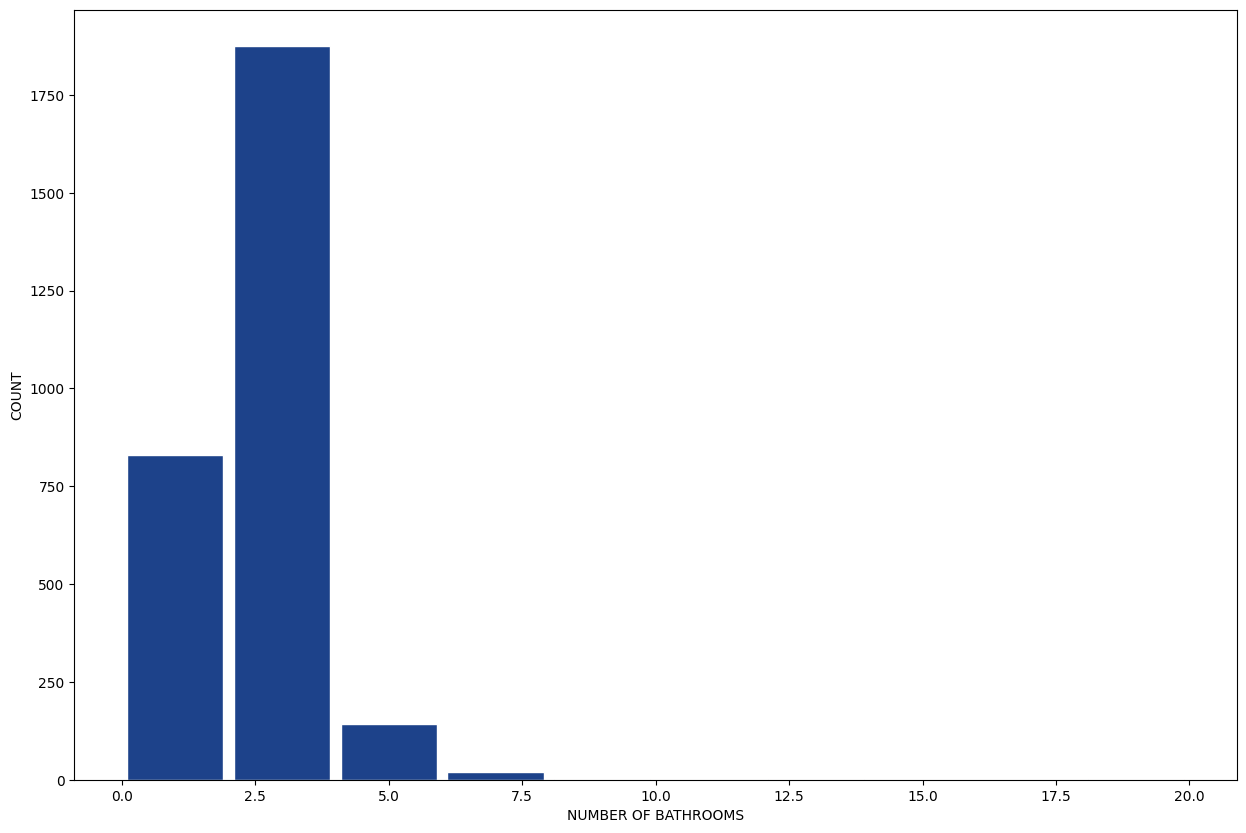

In [42]:
plt.hist(df9.BATHS,color='#1D428A',rwidth=0.9, edgecolor='WHITE')
plt.xlabel("NUMBER OF BATHROOMS")
plt.ylabel("COUNT")

In [43]:
df9[df9.BATHS>10]

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE_SQFT
2334,Jacksonville,339900.0,4.0,20,1652.0,206.0
4799,Washington,3650000.0,12.0,13,7098.0,514.0


In [44]:
df9[df9.BATHS>df9.BEDS+2]

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE_SQFT
1042,Cleveland,244900.0,0.0,4,2016.0,121.0
2334,Jacksonville,339900.0,4.0,20,1652.0,206.0


In [45]:
df10 = df9[df9.BATHS<df9.BEDS+2]
df10.shape

(2864, 6)

In [46]:
df10.head(2)

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE_SQFT
0,Antioch,369000.0,3.0,2,1720.0,215.0
1,Antioch,279900.0,2.0,2,1258.0,222.0


In [47]:
encoding = pd.get_dummies(df10.CITY)
encoding.head(3)

,Antioch,Baltimore,Boston,Brooklyn,Charlotte,Chicago,Cleveland,Columbus,Dallas,Detroit,...,San Francisco,San Jose,Scottsdale,Seattle,Stallings,Staten Island,Vancouver,Washington,Yukon,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df11 = pd.concat([df10,encoding.drop('other',axis='columns')],axis='columns')
df11.head()

,CITY,PRICE,BEDS,BATHS,SQFT,PRICE_SQFT,Antioch,Baltimore,Boston,Brooklyn,...,San Diego,San Francisco,San Jose,Scottsdale,Seattle,Stallings,Staten Island,Vancouver,Washington,Yukon
0,Antioch,369000.0,3.0,2,1720.0,215.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Antioch,279900.0,2.0,2,1258.0,222.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Antioch,379900.0,3.0,2,1666.0,228.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Antioch,359900.0,3.0,2,1530.0,235.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Antioch,525000.0,4.0,3,2523.0,208.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df12 = df11.drop('CITY',axis='columns')
df12.head(2)

,PRICE,BEDS,BATHS,SQFT,PRICE_SQFT,Antioch,Baltimore,Boston,Brooklyn,Charlotte,...,San Diego,San Francisco,San Jose,Scottsdale,Seattle,Stallings,Staten Island,Vancouver,Washington,Yukon
0,369000.0,3.0,2,1720.0,215.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,279900.0,2.0,2,1258.0,222.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df13 = df12.drop(['PRICE_SQFT'],axis='columns')
df13.head(3)
df13.shape

(2864, 45)

In [51]:
X = df13.drop(['PRICE'],axis='columns')
X.head(3)

,BEDS,BATHS,SQFT,Antioch,Baltimore,Boston,Brooklyn,Charlotte,Chicago,Cleveland,...,San Diego,San Francisco,San Jose,Scottsdale,Seattle,Stallings,Staten Island,Vancouver,Washington,Yukon
0,3.0,2,1720.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2,1258.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2,1666.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X.shape

(2864, 44)

In [53]:
y = df13.PRICE
y.head(4)

0    369000.0
1    279900.0
2    379900.0
3    359900.0
Name: PRICE, dtype: float64

In [54]:
len(y)

2864

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [56]:
#Linear regresion method
from sklearn.linear_model import LinearRegression
ln_rgr = LinearRegression()
ln_rgr.fit(X_train,y_train)
ln_rgr.score(X_test,y_test)

0.6975707462781979

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77370389, 0.75114871, 0.75740319, 0.77171151, 0.76987721])

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-package

,model,best_score,best_params
0,linear_regression,0.764769,{'positive': False}
1,lasso,0.764771,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.895711,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [59]:
encoding.head(3)

,Antioch,Baltimore,Boston,Brooklyn,Charlotte,Chicago,Cleveland,Columbus,Dallas,Detroit,...,San Francisco,San Jose,Scottsdale,Seattle,Stallings,Staten Island,Vancouver,Washington,Yukon,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [61]:
from sklearn.tree import DecisionTreeRegressor

# Create the regressor object
regressor = DecisionTreeRegressor(random_state = 10)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)
# Predict the target values for the test data
regressor.predict(X_test)

array([1079900.        ,  152500.        ,  460000.        ,
        452500.        ,  906000.        , 1380000.        ,
        285000.        ,  120000.        ,  316500.        ,
        105000.        ,  742900.        ,   86000.        ,
       1000000.        ,  399900.        ,  400000.        ,
        105000.        ,  547290.        ,  730000.        ,
        255000.        , 3250000.        , 1370000.        ,
       1849000.        , 1600000.        ,  365000.        ,
       1399000.        ,   65000.        ,  235000.        ,
         74500.        ,  739900.        ,  310000.        ,
        660000.        ,  205000.        , 1482000.        ,
        994750.        , 1800000.        , 1225000.        ,
        661900.        ,  399999.        ,  735000.        ,
        330000.        ,  425000.        ,  349900.        ,
        575000.        ,  289900.        ,  899000.        ,
        355000.        , 1217000.        ,  140000.        ,
        299000.        ,

In [62]:
df13.describe()

,PRICE,BEDS,BATHS,SQFT,Antioch,Baltimore,Boston,Brooklyn,Charlotte,Chicago,...,San Diego,San Francisco,San Jose,Scottsdale,Seattle,Stallings,Staten Island,Vancouver,Washington,Yukon
count,2.864000e+03,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,...,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,6.711371e+05,2.878492,2.001746,1663.482891,0.009078,0.011173,0.037011,0.009078,0.035265,0.036662,...,0.040852,0.028282,0.047835,0.004190,0.040154,0.003142,0.005587,0.057612,0.045740,0.012570
std,7.291603e+05,1.322277,0.930147,919.708781,0.094863,0.105129,0.188822,0.094863,0.184482,0.187963,...,0.197982,0.165807,0.213455,0.064605,0.196354,0.055979,0.074547,0.233048,0.208958,0.111428
min,2.300000e+04,0.000000,0.000000,337.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.746750e+05,2.000000,1.000000,1064.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.399000e+05,3.000000,2.000000,1438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.999000e+05,3.000000,2.000000,2015.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.050000e+07,13.000000,13.000000,8400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
df13['PRICE'].round(2)

0        369000.0
1        279900.0
2        379900.0
3        359900.0
4        525000.0
          ...    
5562     264000.0
5564     260000.0
5565     629900.0
5567    1460000.0
5568    1475000.0
Name: PRICE, Length: 2864, dtype: float64

In [64]:
df13.describe().round(2)

,PRICE,BEDS,BATHS,SQFT,Antioch,Baltimore,Boston,Brooklyn,Charlotte,Chicago,...,San Diego,San Francisco,San Jose,Scottsdale,Seattle,Stallings,Staten Island,Vancouver,Washington,Yukon
count,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,...,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00
mean,671137.10,2.88,2.00,1663.48,0.01,0.01,0.04,0.01,0.04,0.04,...,0.04,0.03,0.05,0.00,0.04,0.00,0.01,0.06,0.05,0.01
std,729160.29,1.32,0.93,919.71,0.09,0.11,0.19,0.09,0.18,0.19,...,0.20,0.17,0.21,0.06,0.20,0.06,0.07,0.23,0.21,0.11
min,23000.00,0.00,0.00,337.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,274675.00,2.00,1.00,1064.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,439900.00,3.00,2.00,1438.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,799900.00,3.00,2.00,2015.75,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,10500000.00,13.00,13.00,8400.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [65]:
X.columns

Index(['BEDS', 'BATHS', 'SQFT', 'Antioch', 'Baltimore', 'Boston', 'Brooklyn',
       'Charlotte', 'Chicago', 'Cleveland', 'Columbus', 'Dallas', 'Detroit',
       'Dublin', 'Edmond', 'Fort Worth', 'Hammond', 'Hermitage', 'Houston',
       'Indianapolis', 'Jacksonville', 'La Jolla', 'La Vergne', 'Madison',
       'Miami', 'Naperville', 'Nashville', 'New York', 'Oak Park',
       'Oklahoma City', 'Old Hickory', 'Phoenix', 'Queens', 'San Antonio',
       'San Diego', 'San Francisco', 'San Jose', 'Scottsdale', 'Seattle',
       'Stallings', 'Staten Island', 'Vancouver', 'Washington', 'Yukon'],
      dtype='object')

In [66]:
def predict_price(CITY,SQFT,BATHS,BEDS):    
    loc_index = np.where(X.columns==CITY)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = BEDS
    x[1] = BATHS
    x[2] = SQFT
    if loc_index >= 0:
        x[loc_index] = 1

    return regressor.predict([x])[0]

In [67]:
predict_price('Detroit', 1000, 1, 2 )

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


100000.0

In [68]:
X.columns

Index(['BEDS', 'BATHS', 'SQFT', 'Antioch', 'Baltimore', 'Boston', 'Brooklyn',
       'Charlotte', 'Chicago', 'Cleveland', 'Columbus', 'Dallas', 'Detroit',
       'Dublin', 'Edmond', 'Fort Worth', 'Hammond', 'Hermitage', 'Houston',
       'Indianapolis', 'Jacksonville', 'La Jolla', 'La Vergne', 'Madison',
       'Miami', 'Naperville', 'Nashville', 'New York', 'Oak Park',
       'Oklahoma City', 'Old Hickory', 'Phoenix', 'Queens', 'San Antonio',
       'San Diego', 'San Francisco', 'San Jose', 'Scottsdale', 'Seattle',
       'Stallings', 'Staten Island', 'Vancouver', 'Washington', 'Yukon'],
      dtype='object')

In [69]:
predict_price('San Jose', 1511, 2, 4 )

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


1150000.0

In [76]:
import pickle
with open('home_price_prediction.pickle', 'wb') as f:
    pickle.dump(regressor, f)

In [77]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))